In [11]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os

In [19]:
data_path = 'ssvep_dataset/'
subj_list = os.listdir(data_path)
records = {k: [] for k in subj_list}
for subj in subj_list:
    record_all = os.listdir(data_path+subj+'/')
    n = len(record_all)//4#number of records of a given subject
    for i in range(n):
        records[subj].append(record_all[i*4][:28])
records

{'subject01': ['record-[2012.07.06-19.02.16]', 'record-[2012.07.06-19.06.14]'],
 'subject02': ['record-[2012.07.19-17.36.23]', 'record-[2012.07.19-17.41.14]'],
 'subject03': ['record-[2012.07.11-15.25.23]', 'record-[2012.07.11-15.33.08]'],
 'subject04': ['record-[2012.07.18-17.52.30]', 'record-[2012.07.18-17.56.53]'],
 'subject05': ['record-[2012.07.19-11.24.02]', 'record-[2012.07.19-11.28.18]'],
 'subject06': ['record-[2012.07.20-12.20.55]', 'record-[2012.07.20-12.26.47]'],
 'subject07': ['record-[2012.07.11-15.33.08]',
  'record-[2012.07.18-09.15.30]',
  'record-[2012.07.18-09.21.13]'],
 'subject08': ['record-[2013.04.06-16.22.32]',
  'record-[2013.04.06-16.22.32]',
  'record-[2013.04.06-16.29.18]'],
 'subject09': ['record-[2013.04.09-17.32.29]', 'record-[2013.04.09-17.39.37]'],
 'subject10': ['record-[2014.02.26-15.10.48]',
  'record-[2014.02.26-15.10.48]',
  'record-[2014.02.26-15.32.36]',
  'record-[2014.02.26-15.40.22]',
  'record-[2014.02.26-15.50.09]',
  'record-[2014.02.26-16.

In [49]:
#choose a subject and a record of that subject
chosen_subject_index = 11 #suject12
chosen_subject = subj_list[chosen_subject_index]
print("The chosen subject is",chosen_subject,". He has",len(records[chosen_subject]),"records")
session_index = 0 #the first session of the subject12
print("The chosen session was done on",records[chosen_subject][session_index][8:27])

The chosen subject is subject12 . He has 5 records
The chosen session was done on 2014.03.10-19.17.37


In [50]:
tmin=2
tmax=5
event_id = dict(resting=1, stim13=2, stim17=3, stim21=4)#define the events
freq_events={'resting':0,'stim13':13,'stim17':17,'stim21':21}

fname = chosen_subject+'/'+records[chosen_subject][session_index]
raw = mne.io.read_raw_fif(data_path + fname + '_raw.fif',preload=True)

Opening raw data file ssvep_dataset/subject12/record-[2014.03.10-19.17.37]_raw.fif...
Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...


In [45]:
print(raw)
raw.info

<Raw | record-[2014.03.10-19.17.37]_raw.fif, 8 x 192224 (750.9 s), ~11.7 MB, data loaded>


<Info | 14 non-empty values
 bads: []
 ch_names: Oz, O1, O2, PO3, POz, PO7, PO8, PO4
 chs: 8 EEG
 custom_ref_applied: True
 description: This dataset gathers SSVEP-based BCI recordings of 12 subjects ...
 experimenter: Emmanuel Kalunga
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 line_freq: 50.0
 lowpass: 128.0 Hz
 meas_date: 2014-03-10 18:17:37 UTC
 meas_id: 4 items (dict)
 nchan: 8
 projs: []
 sfreq: 256.0 Hz
 subject_info: 2 items (dict)
>

Effective window size : 8.000 (s)


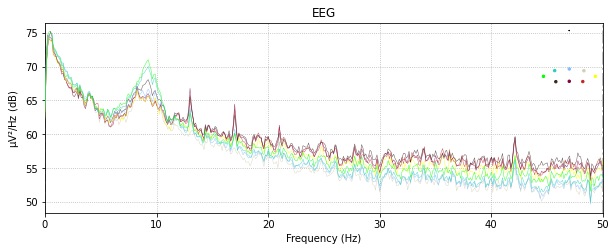

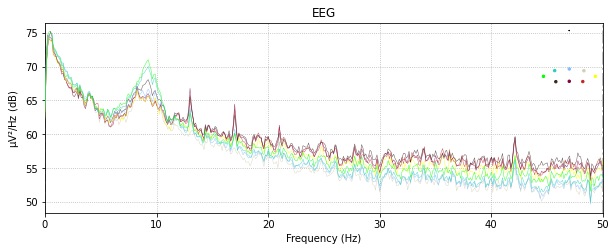

In [51]:
raw.plot_psd(fmax=50,average=False)

Effective window size : 8.000 (s)


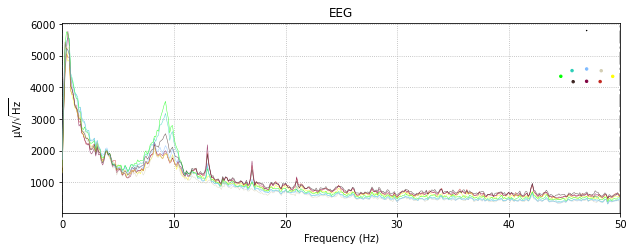

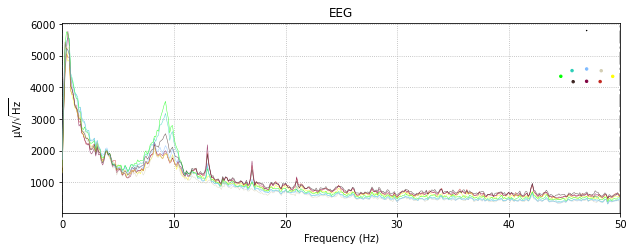

In [53]:
raw.plot_psd(fmax=50,dB=False)

Effective window size : 8.000 (s)


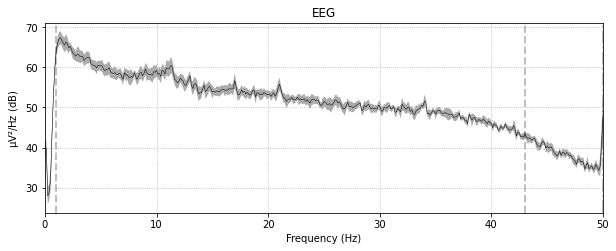

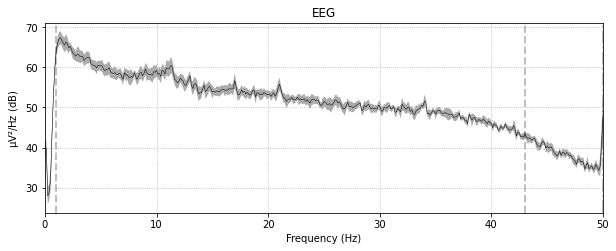

In [8]:
raw.plot_psd(fmax=50,average=True)

In [39]:
picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False)
picks #channels

array([0, 1, 2, 3, 4, 5, 6, 7])

In [36]:
events = mne.read_events(data_path + fname + '-eve.fif')
events

array([[11649,     0,     1],
       [13953,     0,     1],
       [16257,     0,     1],
       [18561,     0,     3],
       [20865,     0,     4],
       [23169,     0,     2],
       [25473,     0,     3],
       [27777,     0,     1],
       [30081,     0,     2],
       [32385,     0,     4],
       [34689,     0,     2],
       [36993,     0,     3],
       [39297,     0,     1],
       [41601,     0,     4],
       [43905,     0,     3],
       [46209,     0,     4],
       [48513,     0,     2],
       [50817,     0,     1],
       [53121,     0,     4],
       [55425,     0,     2],
       [57729,     0,     3],
       [60033,     0,     4],
       [62337,     0,     1],
       [64641,     0,     2],
       [66945,     0,     3],
       [69249,     0,     2],
       [71553,     0,     4],
       [73857,     0,     1],
       [76161,     0,     3],
       [78465,     0,     4],
       [80769,     0,     3],
       [83073,     0,     2]])

In [100]:
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, picks=picks,
                    baseline=None, preload=True, verbose=False)
epochs

Number of events,32
Events,resting: 8stim13: 8stim17: 8stim21: 8
Time range,2.000 – 5.000 sec
Baseline,off


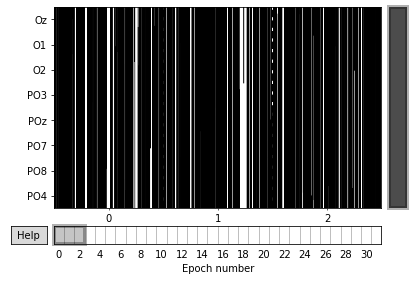

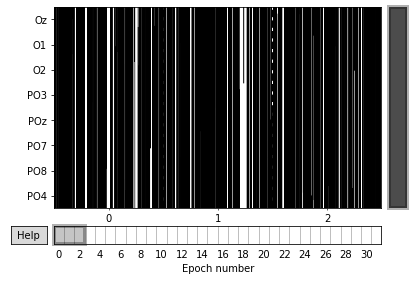

In [57]:
epochs.plot(title='SSVEP epochs', n_channels=8, n_epochs=3)

Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
Effective window size : 1.000 (s)


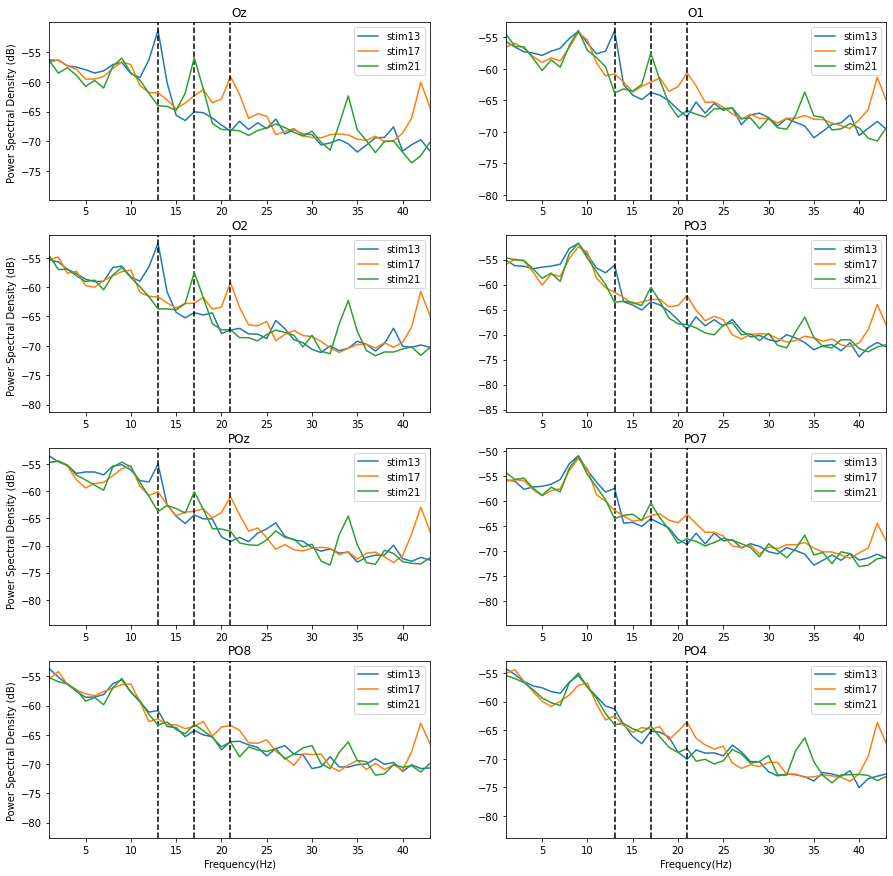

In [79]:
#the power spectral density for the different sensors (no filtering yet)

fig,axs = plt.subplots(4,2,figsize=(15,15))
axs = axs.flatten()
psds,freqs = [],[]
for event in event_id.keys():
    psd,freq = mne.time_frequency.psd_welch(epochs[event])
    psds.append(10*np.log10(psd))
    freqs.append(freq)

for i in range(len(picks)):
    for j in range(1,len(freqs)):
        psd = psds[j]
        axs[i].plot(freqs[j],psd.mean(0)[i,:], label=list(event_id.keys())[j])
        axs[i].axvline(x=freq_events[list(event_id.keys())[j]],linestyle='dashed',color='black')
    if i%2==0:
        axs[i].set_ylabel('Power Spectral Density (dB) ')
    axs[i].set_title(raw.ch_names[i])
    axs[i].legend()
    axs[i].set_xlim((LB,HB))
axs[i-1].set_xlabel('Frequency(Hz)')
axs[i].set_xlabel('Frequency(Hz)')
plt.show()
    

Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
Effective window size : 1.000 (s)


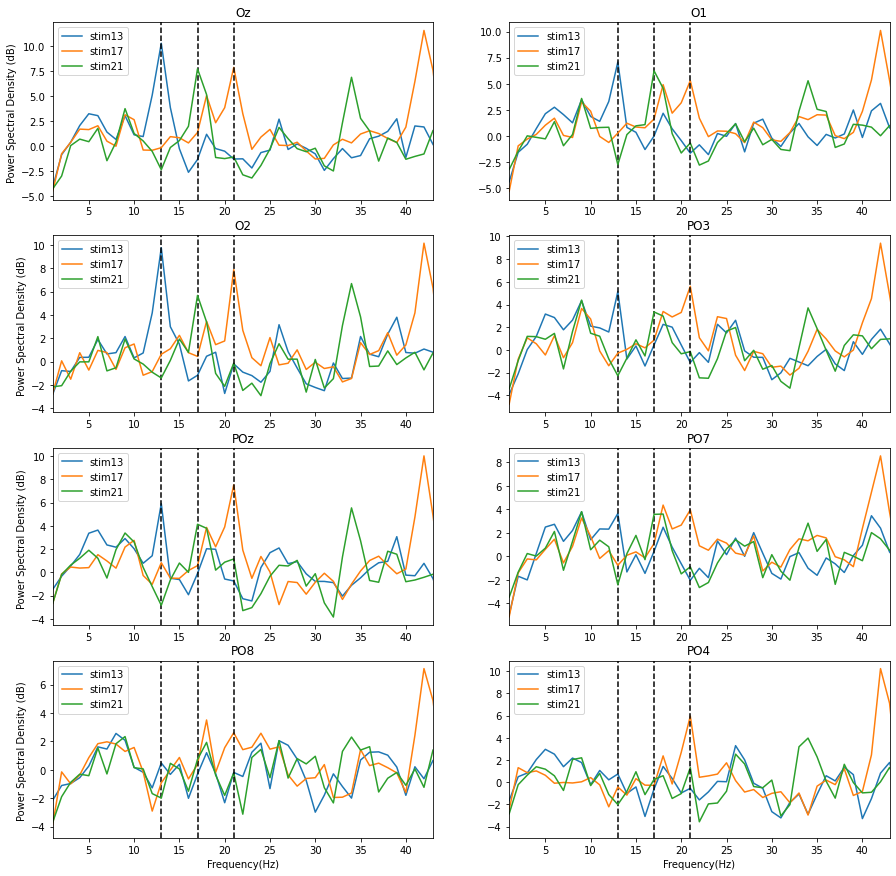

In [80]:
#the power spectral density for the different sensors (no filtering yet): remove the impact of the resting signal

fig,axs = plt.subplots(4,2,figsize=(15,15))
axs = axs.flatten()
psds,freqs = [],[]
for event in event_id.keys():
    psd,freq = mne.time_frequency.psd_welch(epochs[event])
    psds.append(10*np.log10(psd))
    freqs.append(freq)

for i in range(len(picks)):
    for j in range(1,len(freqs)):
        psd = psds[j]-psds[0]
        axs[i].plot(freqs[j],psd.mean(0)[i,:], label=list(event_id.keys())[j])
        axs[i].axvline(x=freq_events[list(event_id.keys())[j]],linestyle='dashed',color='black')
    if i%2==0:
        axs[i].set_ylabel('Power Spectral Density (dB) ')
    axs[i].set_title(raw.ch_names[i])
    axs[i].legend()
    axs[i].set_xlim((LB,HB))
axs[i-1].set_xlabel('Frequency(Hz)')
axs[i].set_xlabel('Frequency(Hz)')
plt.show()
    

In [97]:
epochs_bis = mne.make_fixed_length_epochs(raw,duration=3,preload=False)
epochs_bis

Not setting metadata
Not setting metadata
250 matching events found
No baseline correction applied
0 projection items activated


Number of events,250
Events,1: 250
Time range,0.000 – 2.996 sec
Baseline,off


In [101]:
#filering
epochs.filter(LB,HB,method='iir')
data = epochs_bis.get_data()
data.shape

Loading data for 250 events and 768 original time points ...


(250, 8, 768)

Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
Effective window size : 1.000 (s)


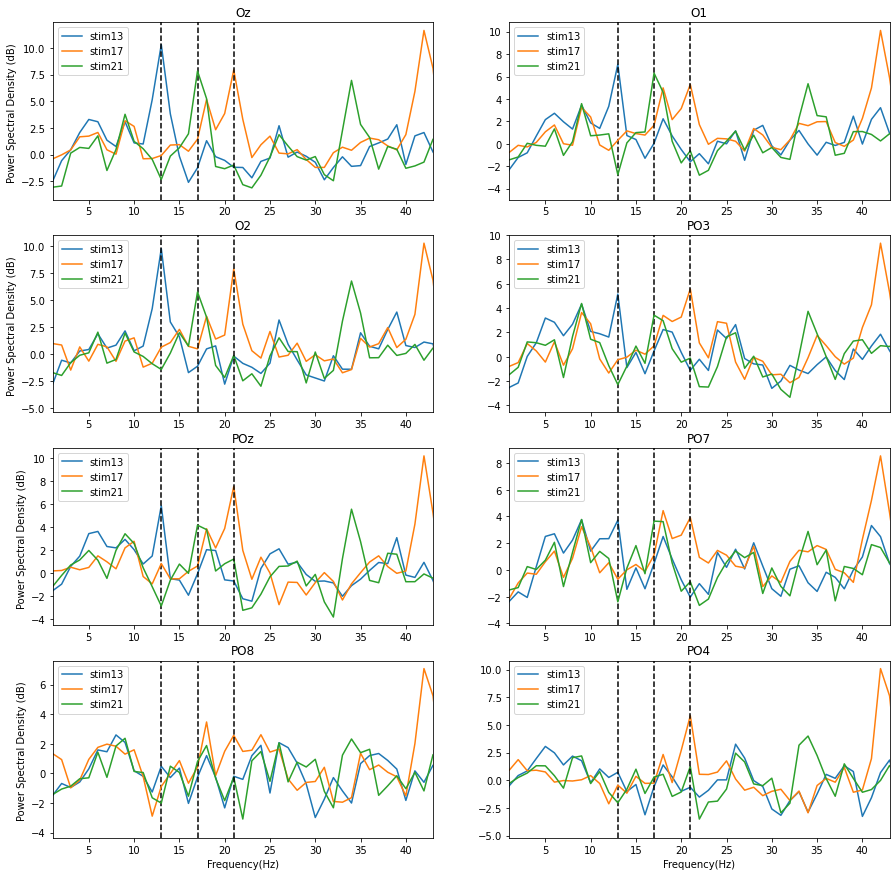

In [104]:
#plot psd after filtering 

fig,axs = plt.subplots(4,2,figsize=(15,15))
axs = axs.flatten()
psds,freqs = [],[]
for event in event_id.keys():
    psd,freq = mne.time_frequency.psd_welch(epochs[event])
    psds.append(10*np.log10(psd))
    freqs.append(freq)

for i in range(len(picks)):
    for j in range(1,len(freqs)):
        psd = psds[j]-psds[0]
        axs[i].plot(freqs[j],psd.mean(0)[i,:], label=list(event_id.keys())[j])
        axs[i].axvline(x=freq_events[list(event_id.keys())[j]],linestyle='dashed',color='black')
    if i%2==0:
        axs[i].set_ylabel('Power Spectral Density (dB) ')
    axs[i].set_title(raw.ch_names[i])
    axs[i].legend()
    axs[i].set_xlim((LB,HB))
axs[i-1].set_xlabel('Frequency(Hz)')
axs[i].set_xlabel('Frequency(Hz)')
plt.show()
    